<a href="https://colab.research.google.com/github/brucebra000/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
# TODO
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [4]:
df = pd.merge(income, lifespan)
df = pd.merge(df, population)
subset_cols = ['country', 'name', 'world_4region', 'world_6region']
merged = pd.merge(df, entities[subset_cols], left_on = 'geo', right_on = 'country').drop(columns = ['geo'])
merged.head()

time  ...  world_6region
0  1800  ...     south_asia
1  1801  ...     south_asia
2  1802  ...     south_asia
3  1803  ...     south_asia
4  1804  ...     south_asia

[5 rows x 8 columns]

In [5]:
mapping_1 = {
    'time': 'year',
    'country': 'country_code',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'population_total': 'population',
    'world_4region': '4region',
    'world_6region': '6region',
    'life_expectancy_years': 'lifespan'
}
mapping_2 = {'name': 'country'}
merged = merged.rename(columns = mapping_1)
merged = merged.rename(columns = mapping_2)

merged.head()

year  income  lifespan  ...      country 4region     6region
0  1800     603     28.21  ...  Afghanistan    asia  south_asia
1  1801     603     28.20  ...  Afghanistan    asia  south_asia
2  1802     603     28.19  ...  Afghanistan    asia  south_asia
3  1803     603     28.18  ...  Afghanistan    asia  south_asia
4  1804     603     28.17  ...  Afghanistan    asia  south_asia

[5 rows x 8 columns]

In [0]:
mask_usa = merged['country'] == 'United States'
usa = merged[mask_usa]
mask_china = merged['country'] == 'China'
china = merged[mask_china]

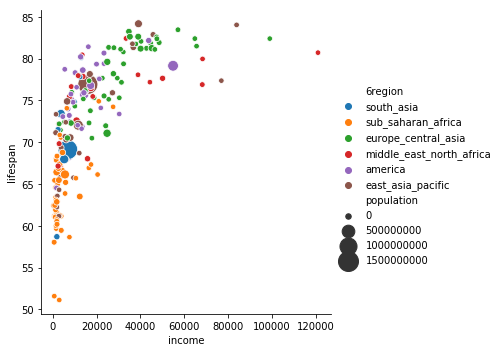

In [7]:
now = merged[merged['year'].isin([2018])]
sns.relplot(x = 'income',
            y = 'lifespan',
            hue = '6region',
            size = 'population',
            sizes = (30, 400),
            data = now
            );

In [8]:
np.corrcoef(now['lifespan'], now['income'])

array([[1.        , 0.67035369],
       [0.67035369, 1.        ]])

In [9]:
df_1990 = merged[merged['year'] == 1990]
np.corrcoef(df_1990['lifespan'], df_1990['income']) [0][1]

0.5665901206189361

In [0]:
years = range(1900, 2019)
corr_list = []
for year in years:
  df_year = merged[merged['year'] == year]
  corr = np.corrcoef(df_year['lifespan'], df_year['income'])[0][1]
  corr_list.append(corr)
  
corr_arr = np.array(corr_list)
year_arr = np.array(years)

In [11]:
np.argmax(corr_arr)

34

Text(119033, 73.71, 'Qatar')

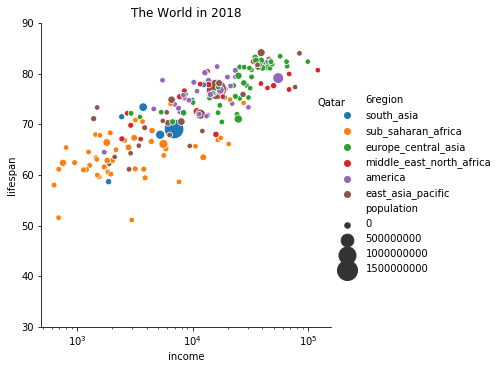

In [12]:
now_qatar = now[now['country'] == 'Qatar']
sns.relplot(x = 'income',
            y = 'lifespan',
            hue = '6region',
            size = 'population',
            sizes = (30, 400),
            data = now
           )
plt.xscale('log')
plt.ylim([30, 90])
plt.title('The World in 2018')
plt.text(x = now_qatar['income'].values[0] - 2000,
         y = now_qatar['lifespan'].values[0] - 7,
         s = 'Qatar'
        )

Text(0.5, 1.0, 'The World in 2008')

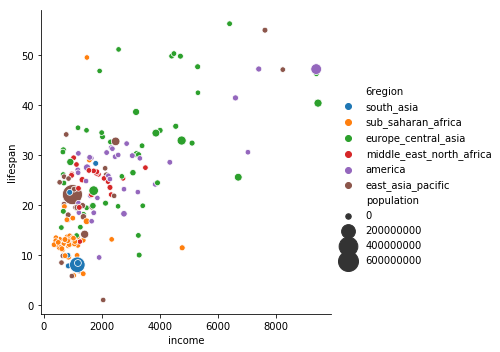

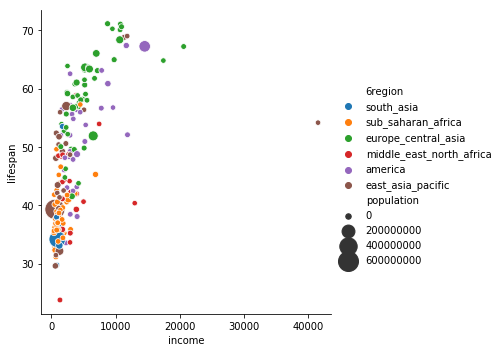

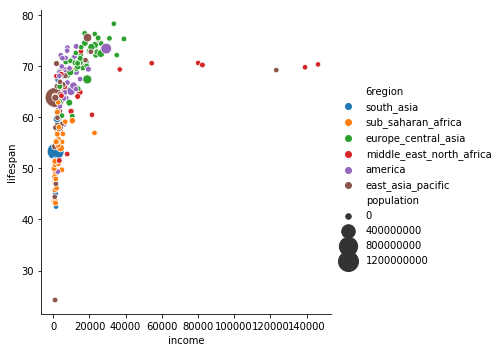

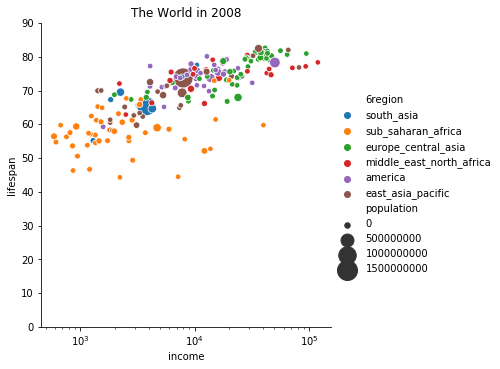

In [13]:
years = [1918, 1948, 1978, 2008]
for year in years:
  df_year = merged[merged['year'] == year]
  sns.relplot(x = 'income',
            y = 'lifespan',
            hue = '6region',
            size = 'population',
            sizes = (30, 400),
            data = df_year
           );
plt.xscale('log')
plt.ylim([0, 90])
plt.title(f'The World in {year}')

In [14]:
import plotly.express as px

px.scatter(merged,
           x = 'income',
           y = 'lifespan',
           size = 'population',
           size_max = 55,
           animation_frame = 'year',
           color = '6region',
           log_x = True,
           hover_name = 'country'
          )

In [15]:
merged.head()

year  income  lifespan  ...      country 4region     6region
0  1800     603     28.21  ...  Afghanistan    asia  south_asia
1  1801     603     28.20  ...  Afghanistan    asia  south_asia
2  1802     603     28.19  ...  Afghanistan    asia  south_asia
3  1803     603     28.18  ...  Afghanistan    asia  south_asia
4  1804     603     28.17  ...  Afghanistan    asia  south_asia

[5 rows x 8 columns]

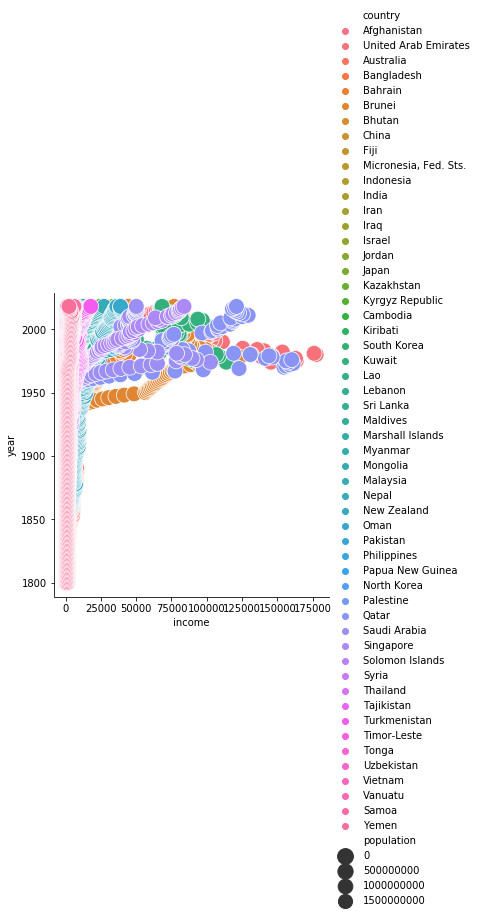

In [37]:
asia = merged[merged['4region'].isin(['asia'])]
sns.relplot(x = 'income',
            y = 'year',
            hue = 'country',
            size = 'population',
            sizes = (250, 200),
            data = asia
            );

In [42]:
px.scatter(merged,
           x = 'income',
           y = 'country',
           size = 'population',
           size_max = 75,
           animation_frame = 'year',
           color = '6region',
           log_x = True,
           hover_name = 'country'
          )

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO